## Classes Overview

Python is a very customizable language and it provides a variety of ways to control how objects are created, converted to strings, compared to each other and much more.

This customize ability is achieved by using special functions and features that are part of every object defined in Python. 

USING PYTHON CLASSES 

a) to create enumerations 
b) to customize how your objects are converted to string values when they are passed to Python functions such as str or repr, classes can also have computed and default attributes
c) to define functions that let classes be compared to each other. 
d) to use logical operations like greater than, less than and so on. 
e) Give classes numeric-like behavior so they can support operations like addition and subtraction. 

How to use these techniques to create classes that are easy to work with, and are flexible enough to solve a variety of programming challenges.

## Enumerations

In [16]:
from enum import Enum, unique, auto

In [20]:
# define enumerations using the Enum base class

class Fruit(Enum): # Enum is super class here
    APPLE = 1
    BANANA = 2
    ORANGE = 3
    TOMATO = 4
   
 def main():
    # enums have human-readable values and types
    print(Fruit.APPLE)
    print(type(Fruit.APPLE)) # Class Type = Enum
    print(repr(Fruit.APPLE)) # repr Function is to get the string representation of the of the name of Enum and Value associated with it


if __name__ == "__main__":
    main()



Fruit.APPLE
<enum 'Fruit'>
<Fruit.APPLE: 1>


In [21]:

class Fruit(Enum):
    APPLE = 1
    BANANA = 2
    ORANGE = 3
    TOMATO = 4
    
def main():
    # enums have name and value properties when we declare them
    print(Fruit.APPLE.name, Fruit.APPLE.value)

if __name__ == "__main__":
    main()


APPLE 1


In [15]:

class Fruit(Enum):
    APPLE = 1
    BANANA = 2
    ORANGE = 3
    TOMATO = 4
    APPLE = 6
    PEAR = auto()


def main():
    # enums have name and value properties
    print(Fruit.APPLE.name, Fruit.APPLE.value)

if __name__ == "__main__":
    main()
    
# Note: In Enum - We cant have duplicate names. We can have duplicate values though    

TypeError: Attempted to reuse key: 'APPLE'

Note: We can prevent the duplicate reuse error by using the "unique" decorator from Enum package

In [22]:
class Fruit(Enum):
    APPLE = 1
    BANANA = 2
    ORANGE = 3
    TOMATO = 4
    CHERRY = 1 # Note: Repeat value is acceptable - Python will not give error
    
def main():
    # enums have name and value properties
    print(Fruit.APPLE.name, Fruit.APPLE.value)

if __name__ == "__main__":
    main()

APPLE 1


In [18]:
 @unique
class Fruit(Enum):
    APPLE = 1
    BANANA = 2
    ORANGE = 3
    TOMATO = 4
    PEAR = auto()


def main():
     # print the auto-generated value. Here 5 value is automatically allocated to PEAR
    print(Fruit.PEAR.value)

if __name__ == "__main__":
    main()

5


In [19]:
 @unique
class Fruit(Enum):
    APPLE = 1
    BANANA = 2
    ORANGE = 3
    TOMATO = 4
    PEAR = auto()


def main():
     # enums are hashable - can be used as keys
    myFruits = {}
    myFruits[Fruit.BANANA] = "Come Mr. Tally-man"
    print(myFruits[Fruit.BANANA])

if __name__ == "__main__":
    main()


Come Mr. Tally-man


## Class string values

In [25]:
# customize string representations of objects

class Person():
    def __init__(self):
        self.fname = "Joe"
        self.lname = "Marini"
        self.age = 25

    # use __repr__ to create a string useful for debugging
    def __repr__(self):
        return "<Person Class - fname:{0}, lname:{1}, age{2}>".format(self.fname, self.lname, self.age)

    # use str for a more human-readable string
    def __str__(self):
        return "Person ({0} {1} is {2})".format(self.fname, self.lname, self.age)

    # use bytes to convert the informal string to a bytes object
    def __bytes__(self):
        val = "Person:{0}:{1}:{2}".format(self.fname, self.lname, self.age)
        return bytes(val.encode('utf-8'))


def main():
    # create a new Person object
    cls1 = Person()

    # use different Python functions to convert it to a string
    print(repr(cls1))
    print(str(cls1))
    print("Formatted: {0}".format(cls1))
    print(bytes(cls1))


if __name__ == "__main__":
    main()


<Person Class - fname:Joe, lname:Marini, age25>
Person (Joe Marini is 25)
Formatted: Person (Joe Marini is 25)
b'Person:Joe:Marini:25'


## Computer attributes

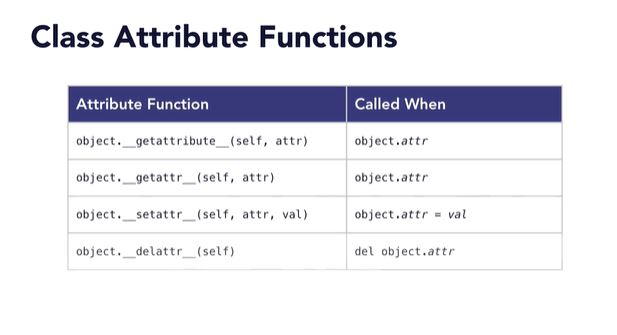

In [26]:
# customize string representations of objects


class myColor():
    def __init__(self):
        self.red = 50
        self.green = 75
        self.blue = 100

    # use getattr to dynamically return a value
    def __getattr__(self, attr):
        if attr == "rgbcolor":
            return (self.red, self.green, self.blue)
        elif attr == "hexcolor":
            return "#{0:02x}{1:02x}{2:02x}".format(self.red, self.green, self.blue)
        else:
            raise AttributeError

    # use setattr to dynamically return a value
    def __setattr__(self, attr, val):
        if attr == "rgbcolor":
            self.red = val[0]
            self.green = val[1]
            self.blue = val[2]
        else:
            super().__setattr__(attr, val)

    # use dir to list the available properties
    def __dir__(self):
        return ("rgbolor", "hexcolor")


def main():
    # create an instance of myColor
    cls1 = myColor()
    # print the value of a computed attribute
    print(cls1.rgbcolor)
    print(cls1.hexcolor)

    # set the value of a computed attribute
    cls1.rgbcolor = (125, 200, 86)
    print(cls1.rgbcolor)
    print(cls1.hexcolor)

    # access a regular attribute
    print(cls1.red)

    # list the available attributes
    print(dir(cls1))


if __name__ == "__main__":
    main()


(50, 75, 100)
#324b64
(125, 200, 86)
#7dc856
125
['hexcolor', 'rgbolor']


## Object operations

## Object comparisons